<a href="https://colab.research.google.com/github/souravs17031999/Projects-kaggle-problems-60daysofudacity/blob/master/NLP_FEDERATED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : NLP Emotion recognition 

## Importing all the packages 

In [0]:
# Imports here
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
import torch
from torch import nn
from torch import optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import torch.utils.data as data_utils
from PIL import Image, ImageFile
import json
from torch.optim import lr_scheduler
import time
import os
import argparse
import copy
import pandas as pd
import nltk

In [0]:
import re
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
%matplotlib inline

import itertools
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

import warnings

warnings.filterwarnings("ignore")

In [0]:
!pip install syft


     |████████████████████████████████| 256kB 6.7MB/s 
     |████████████████████████████████| 2.1MB 38.2MB/s 
     |████████████████████████████████| 389kB 46.3MB/s 
     |████████████████████████████████| 204kB 46.2MB/s 
     |████████████████████████████████| 81kB 29.0MB/s 
     |████████████████████████████████| 256kB 49.7MB/s 
     |████████████████████████████████| 460kB 49.7MB/s 
     |████████████████████████████████| 266kB 44.7MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
     |████████████████████████████████| 122kB 41.6MB/s 
  Created wheel for zstd: filename=zstd-1.4.1.0-cp36-cp36m-linux_x86_64.whl size=1067082 sha256=9cd7d29f080a442569271481f6fedda118ca72ea623f8c96265ce73e3c1eb62b
  Stored in directory: /root/.cache/pip/wheels/66/3f/ee/ac08c81af7c1b24a80c746df669ea3cb37542d27877d66ccf4
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44105 sha256=a2fcc8204caf660d9e2344f3e9d017d4d76c1cc098b15452bdb59c4ec29f56c9
  Stored in di

In [0]:
import syft as sy
hook = sy.TorchHook(torch)
# let's create two virtual workers who will hold the data while training the model locally
bob = sy.VirtualWorker(hook, id = "bob")
alice = sy.VirtualWorker(hook, id = "alice")
crypto_provider = sy.VirtualWorker(hook, id="crypto_provider")

W0820 15:57:40.711095 139951044118400 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/usr/local/lib/python3.6/dist-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0820 15:57:40.731885 139951044118400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [0]:
# This arguments class is simply defining all the hyperparameters of the model we are going to train on
class Arguments():
    def __init__(self):
        self.batch_size = 64 # batch size for training
        self.test_batch_size = 64 # bacth size for testing 
        self.epochs = 10 # no of epochs
        self.lr = 0.01  # setting learning rate
        self.momentum = 0.5 
        self.no_cuda = False  
        self.seed = 1
        self.log_interval = 10
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

## Loading the dataset

In [0]:
### Helper functions
import pickle

def convert_to_pickle(item, directory):
    pickle.dump(item, open(directory,"wb"))


def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


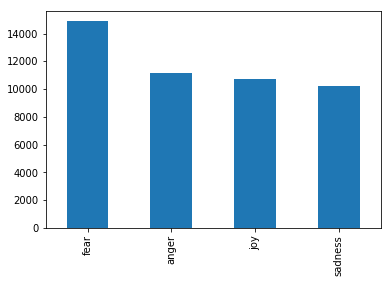

In [0]:
# load data
# text_data = load_from_pickle(directory="/content/drive/My Drive/train-1.pkl")
text_data = load_from_pickle(directory="/content/drive/My Drive/train.pkl")
text_data.emotion.value_counts().plot.bar()

In [0]:
text_data.head(10)

id                                             tweets emotion  intensity
0  10000  how the fu k who the heck moved my fridge shou...   anger      0.938
1  10001  so my indian uber driver just called someone t...   anger      0.896
2  10002  uk i asked for my parcel to be delivered to a ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  don t join they put the phone down on you talk...   anger      0.896
5  10005                                my blood is boiling   anger      0.875
6  10006  when you ve still got a whole season of wentwo...   anger      0.875
7  10007  uk why does tracking show my equipment deliver...   anger      0.875
8  10008  legit why i am so furious with him people are ...   anger      0.875
9  10009  how is it suppose to work if you do that wtf d...   anger      0.875

In [0]:
text_data.shape

(46969, 4)

In [0]:
len(text_data['tweets'][0])

84

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Data preprocessing 

In [0]:
text_data["token_size"] = text_data["tweets"].apply(lambda x: len(x.split(' ')))
text_data = text_data.loc[text_data['token_size'] < 70].copy()

In [0]:
words_list = text_data["tweets"].values.tolist()


In [0]:
words = []
for i in words_list:
  words.append(nltk.word_tokenize(i))

## Constructing dictionery for mapping words to index

In [0]:
class ConstructVocab():
    def __init__(self, sentences):
        self.sentences = sentences
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()
        
    def create_index(self):
        for s in self.sentences:
            # update with individual tokens
            self.vocab.update(s.split(' '))
            
        # sort the vocab
        self.vocab = sorted(self.vocab)

        # add a padding token with index 0
        self.word2idx['<pad>'] = 0
        
        # word to index mapping
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1 # +1 because of pad token
        
        # index to word mapping
        for word, index in self.word2idx.items():
            self.idx2word[index] = word  

In [0]:
inputs = ConstructVocab(words_list)

In [0]:
inputs.vocab[0:10]

['a',
 'aa',
 'aaa',
 'aaron',
 'aateam',
 'ab',
 'abby',
 'aber',
 'aberdeen',
 'abhijit']

In [0]:
input_tensor = [[inputs.word2idx[s] for s in es.split(' ')]  for es in words_list]

In [0]:
input_tensor[0:2]

[[3420,
  7358,
  2781,
  3870,
  8087,
  7358,
  3269,
  4695,
  4748,
  2750,
  6602,
  3479,
  3968,
  7358,
  4012,
  2033,
  280,
  4308],
 [6770,
  4748,
  3582,
  7672,
  2080,
  3859,
  1054,
  6807,
  7358,
  4755,
  8170,
  3503,
  3479,
  7977,
  7203,
  3557,
  1,
  4701,
  7831,
  3479,
  1698,
  3226,
  3847,
  5233,
  1955]]

In [0]:
def max_length(tensor):
    return max(len(t) for t in tensor)
# calculate the max_length of input tensor
max_length_inp = max_length(input_tensor)
print(max_length_inp)  

33


In [0]:
def pad_sequences(x, max_len):
    padded = np.zeros((max_len), dtype=np.int64)
    if len(x) > max_len: padded[:] = x[:max_len]
    else: padded[:len(x)] = x
    return padded

In [0]:
# inplace padding
input_tensor = [pad_sequences(x, max_length_inp) for x in input_tensor]

In [0]:
input_tensor[0:2]

[array([3420, 7358, 2781, 3870, 8087, 7358, 3269, 4695, 4748, 2750, 6602,
        3479, 3968, 7358, 4012, 2033,  280, 4308,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]),
 array([6770, 4748, 3582, 7672, 2080, 3859, 1054, 6807, 7358, 4755, 8170,
        3503, 3479, 7977, 7203, 3557,    1, 4701, 7831, 3479, 1698, 3226,
        3847, 5233, 1955,    0,    0,    0,    0,    0,    0,    0,    0])]

In [0]:
### convert targets to one-hot encoding vectors
emotions = list(set(text_data.emotion.unique()))
num_emotions = len(emotions)
# binarizer
mlb = preprocessing.MultiLabelBinarizer()
data_labels =  [set(emos) & set(emotions) for emos in text_data[['emotion']].values]
bin_emotions = mlb.fit_transform(data_labels)
target_tensor = np.array(bin_emotions.tolist())

In [0]:
target_tensor

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [0]:
text_data[0:3]

id  ... token_size
0  10000  ...         18
1  10001  ...         25
2  10002  ...         19

[3 rows x 5 columns]

In [0]:
text_data["emotion"]

0        anger
1        anger
2        anger
3        anger
4        anger
5        anger
6        anger
7        anger
8        anger
9        anger
10       anger
11       anger
12       anger
13       anger
14       anger
15       anger
16       anger
17       anger
18       anger
19       anger
20       anger
21       anger
22       anger
23       anger
24       anger
25       anger
26       anger
27       anger
28       anger
29       anger
         ...  
46939      joy
46940      joy
46941      joy
46942      joy
46943      joy
46944      joy
46945      joy
46946      joy
46947      joy
46948      joy
46949      joy
46950      joy
46951      joy
46952      joy
46953      joy
46954      joy
46955      joy
46956      joy
46957      joy
46958      joy
46959      joy
46960      joy
46961      joy
46962      joy
46963      joy
46964      joy
46965      joy
46966      joy
46967      joy
46968      joy
Name: emotion, Length: 46969, dtype: object

In [0]:
get_emotion = lambda t: np.argmax(t)
get_emotion(target_tensor[1])

0

In [0]:
emotion_dict = {0: 'anger', 1: 'fear', 2: 'sadness', 3: 'joy'}
emotion_dict[get_emotion(target_tensor[0])]

'anger'

In [0]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Split the validataion further to obtain a holdout dataset (for testing) -- split 50:50
input_tensor_val, input_tensor_test, target_tensor_val, target_tensor_test = train_test_split(input_tensor_val, target_tensor_val, test_size=0.5)

# Show length
print(f"training length: {len(input_tensor_train)}")
print(f"training target length: {len(target_tensor_train)}")
print(f"validation length: {len(input_tensor_val)}")
print(f"validation target length: {len(target_tensor_val)}")
print(f"testing length: {len(input_tensor_test)}")
print(f"testing target length: {len(target_tensor_test)}")

training length: 37575
training target length: 37575
validation length: 4697
validation target length: 4697
testing length: 4697
testing target length: 4697


In [0]:
# Training params
EPOCHS = 15
CLIP = 5 # gradient clipping - to avoid gradient explosion (frequent in RNNs)
lr = 0.01
BATCH_SIZE = 64
OUTPUT = 4
# Model params
EMBEDDING_DIM = 50
HIDDEN_DIM = 10
DROPOUT = 0.2
VOCAB_SIZE = len(inputs.word2idx)

In [0]:
input_tensor_train, target_tensor_train = torch.tensor(input_tensor_train), torch.tensor(target_tensor_train) # converting train data list to tensors to it work on pysyft functions
input_tensor_val, target_tensor_val = torch.tensor(input_tensor_val), torch.tensor(target_tensor_val)

In [0]:
train_idx = int(len(target_tensor_train)/2)
test_idx = int(len(target_tensor_val)/2)

In [0]:
bob_train_dataset = sy.BaseDataset(input_tensor_train[:train_idx], target_tensor_train[:train_idx]).send(bob)
alice_train_dataset = sy.BaseDataset(input_tensor_train[train_idx:], target_tensor_train[train_idx:]).send(alice)
bob_test_dataset = sy.BaseDataset(input_tensor_val[:test_idx], target_tensor_val[:test_idx]).send(bob)
alice_test_dataset = sy.BaseDataset(input_tensor_val[test_idx:], target_tensor_val[test_idx:]).send(alice)

# Creating federated datasets, an extension of Pytorch TensorDataset class
federated_train_dataset = sy.FederatedDataset([bob_train_dataset, alice_train_dataset])
federated_test_dataset = sy.FederatedDataset([bob_test_dataset, alice_test_dataset])

# Creating federated dataloaders, an extension of Pytorch DataLoader class
federated_train_loader = sy.FederatedDataLoader(federated_train_dataset, shuffle=True, batch_size=BATCH_SIZE)
federated_test_loader = sy.FederatedDataLoader(federated_test_dataset, shuffle=False, batch_size=BATCH_SIZE)

In [0]:
print(len(federated_train_loader))

588


In [0]:
print(len(federated_test_loader))

74


In [0]:
class GRUCell(nn.Module):

    def __init__(self, input_size, hidden_size, bias=True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        # reset gate
        self.fc_ir = nn.Linear(input_size, hidden_size, bias=bias)
        self.fc_hr = nn.Linear(hidden_size, hidden_size, bias=bias)

        # update gate
        self.fc_iz = nn.Linear(input_size, hidden_size, bias=bias)
        self.fc_hz = nn.Linear(hidden_size, hidden_size, bias=bias)

        # new gate
        self.fc_in = nn.Linear(input_size, hidden_size, bias=bias)
        self.fc_hn = nn.Linear(hidden_size, hidden_size, bias=bias)

        self.init_parameters()

    def init_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, x, h):

        x = x.view(-1, x.shape[1])

        i_r = self.fc_ir(x)
        h_r = self.fc_hr(h)
        i_z = self.fc_iz(x)
        h_z = self.fc_hz(h)
        i_n = self.fc_in(x)
        h_n = self.fc_hn(h)

        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_z + h_z)
        newgate = F.tanh(i_n + (resetgate * h_n))

        hy = newgate + inputgate * (h - newgate)

        return hy


class GRU(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, bias=True, dropout=0.2):
        super(GRU, self).__init__()

        self.hidden_dim = hidden_dim
        self.output_size = output_size

        # Dropout layer
        self.dropout = nn.Dropout(p=dropout)
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # GRU Cell
        self.gru_cell = GRUCell(embedding_dim, hidden_dim)
        # Fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        # Sigmoid layer
        

    def forward(self, x, h):

        batch_size = x.shape[0]

        # Deal with cases were the current batch_size is different from general batch_size
        # It occurrs at the end of iteration with the Dataloaders
        if h.shape[0] != batch_size:
            h = h[:batch_size, :].contiguous()

        # Apply embedding
        x = self.embedding(x)

        # GRU cells
        for t in range(x.shape[1]):
            h = self.gru_cell(x[:,t,:], h)

        # Output corresponds to the last hidden state
        out = h.contiguous().view(-1, self.hidden_dim)

        # Dropout and fully-connected layers
        out = self.dropout(out)
        out = self.fc(out)

        return F.log_softmax(out, dim=1), h

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type(torch.cuda.FloatTensor)

model = GRU(vocab_size=VOCAB_SIZE, output_size = 4, hidden_dim=HIDDEN_DIM, embedding_dim=EMBEDDING_DIM, dropout=DROPOUT)
model.to(device)
print(model)
print(device)


GRU(
  (dropout): Dropout(p=0.2)
  (embedding): Embedding(8347, 50)
  (gru_cell): GRUCell(
    (fc_ir): Linear(in_features=50, out_features=10, bias=True)
    (fc_hr): Linear(in_features=10, out_features=10, bias=True)
    (fc_iz): Linear(in_features=50, out_features=10, bias=True)
    (fc_hz): Linear(in_features=10, out_features=10, bias=True)
    (fc_in): Linear(in_features=50, out_features=10, bias=True)
    (fc_hn): Linear(in_features=10, out_features=10, bias=True)
  )
  (fc): Linear(in_features=10, out_features=4, bias=True)
)
cuda:0


In [0]:
# Defining loss and optimizer
optimizer = optim.SGD(model.parameters(), lr=lr)

In [0]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [0]:
for e in range(EPOCHS):
    
    ######### Training ##########
    print("Training started...")
    losses = []
    # Batch loop
    for batch_idx, (inputs, labels) in enumerate(federated_train_loader):
        # Location of current batch
        worker = inputs.location
        # Initialize hidden state and send it to worker
        h = torch.Tensor(np.zeros((BATCH_SIZE, HIDDEN_DIM))).send(worker)
        # Send model to current worker
        model.send(worker)
        inputs, labels = inputs.to(device), labels.to(device)
        # Setting accumulated gradients to zero before backward step
        optimizer.zero_grad()
        # Output from the model
        output, _ = model(inputs, h)
        # Calculate the loss and perform backprop
        loss = F.nll_loss(output, torch.max(labels, 1)[1]) 
        loss.backward()
        # Clipping the gradient to avoid explosion
        # Backpropagation step
        optimizer.step() 
        # Get the model back to the local worker
        model.get()
        losses.append(loss.get())
        if batch_idx % 20 == 0:
          print(f"epoch : {e+1} batch : {batch_idx}")
          break
    ######## Evaluation ##########
    print("Validation pass entered...")
    # Model in evaluation mode
    model.eval()
    with torch.no_grad():
        test_loss = 0
        accuracy = 0
        for inputs, labels in federated_test_loader:
            # get current location
            worker = inputs.location
            # Initialize hidden state and send it to worker
            h = torch.Tensor(np.zeros((BATCH_SIZE, HIDDEN_DIM))).send(worker)    
            # Send model to worker
            model.send(worker)
            inputs, labels = inputs.to(device), labels.to(device)
            output, _ = model(inputs, h)
            
            test_loss += F.nll_loss(output, torch.max(labels, 1)[1]).get().item() # sum up batch loss
            ps = torch.exp(output)
            top_p , top_class = ps.topk(1,dim=1)
            #print(ps.get())
            pred = []
            target = []
            for i in range(len(labels)):

              target.append(torch.argmax(labels[i]))
              pred.append(torch.argmax(ps.data[i]))   # you need to work on this line only 

            
            # after getting target and pred properly, change the following line of to equals = pred == target
            # let me know if it doesn't work, also let me know if it works 
            equals = pred == target  
            print(equals)
            accuracy += torch.mean(torch.tensor(equals, dtype = torch.float64))
            model.get()
    print("Epoch: {}/{}.. ".format(e+1, EPOCHS),"Valid Loss: {:.3f}.. ".format(test_loss/len(federated_test_loader)),
        "Valid Accuracy: {:.3f}".format(accuracy/len(federated_test_loader)))
    
    model.train()

Training started...
epoch : 1 batch : 0
Validation pass entered...
(Wrapper)>[PointerTensor | me:23920904992 -> bob:19098266579]
(Wrapper)>[PointerTensor | me:72017432509 -> bob:37372007273]
(Wrapper)>[PointerTensor | me:57317679830 -> bob:76055763848]
(Wrapper)>[PointerTensor | me:78897936687 -> bob:24899740210]
(Wrapper)>[PointerTensor | me:33698533465 -> bob:11740991301]
(Wrapper)>[PointerTensor | me:96690549053 -> bob:43436711583]
(Wrapper)>[PointerTensor | me:61982243191 -> bob:73664732196]
(Wrapper)>[PointerTensor | me:79889217633 -> bob:86674920822]
(Wrapper)>[PointerTensor | me:37883308548 -> bob:91137440092]
(Wrapper)>[PointerTensor | me:82067711626 -> bob:1940745432]
(Wrapper)>[PointerTensor | me:17807213180 -> bob:64779432230]
(Wrapper)>[PointerTensor | me:23574796114 -> bob:88172350977]
(Wrapper)>[PointerTensor | me:91742263381 -> bob:62660669632]
(Wrapper)>[PointerTensor | me:7608163275 -> bob:75751219658]
(Wrapper)>[PointerTensor | me:73482789574 -> bob:34250269429]
(Wrap

KeyboardInterrupt: ignored